## Análisis de correspondencias

La idea es encontrar las diferentes filas (o columnas) que se corresponden en información. Es decir identificar entre las variables cualitativas las filas (o columnas) que suministren INFORMACIÓN EQUIVALENTE.

Considere la siguiente información:

In [71]:
import pandas as pd 

DF=pd.read_excel("Ojos_y_cabello.xlsx")
DF 

,Ojos,Cabello
0,Claros,Rubio
1,Claros,Rubio
2,Claros,Rubio
3,Claros,Rubio
4,Claros,Rubio
...,...,...
5382,Oscuros,Negro
5383,Oscuros,Negro
5384,Oscuros,Negro
5385,Oscuros,Negro


Creamos una tabla de contingencia

In [167]:
TC=pd.crosstab(DF["Ojos"],DF["Cabello"])
TCT=pd.crosstab(DF["Ojos"],DF["Cabello"],margins=True)
TCT

Cabello,Medio,Negro,Oscuro,Rojo,Rubio,All
Ojos,,,,,,
Azules,241,3,110,38,326,718
Claros,584,4,188,116,688,1580
Medio,909,26,412,84,343,1774
Oscuros,403,85,681,48,98,1315
All,2137,118,1391,286,1455,5387


In [168]:
DF.count()[1]

5387

In [208]:
TCR=TC/len(DF)
TCRT=TCT/len(DF)
TCRT

Cabello,Medio,Negro,Oscuro,Rojo,Rubio,All
Ojos,,,,,,
Azules,0.044737,0.000557,0.020420,0.007054,0.060516,0.133284
Claros,0.108409,0.000743,0.034899,0.021533,0.127715,0.293299
Medio,0.168740,0.004826,0.076480,0.015593,0.063672,0.329311
Oscuros,0.074810,0.015779,0.126415,0.008910,0.018192,0.244106
All,0.396696,0.021905,0.258214,0.053091,0.270095,1.000000


Estas tablas funcionan como DataFrames:

In [170]:
TC.iloc[1]/sum(TC.iloc[1])

Cabello
Medio     0.369620
Negro     0.002532
Oscuro    0.118987
Rojo      0.073418
Rubio     0.435443
Name: Claros, dtype: float64

In [171]:
TCR["Medio"]

Ojos
Azules     0.044737
Claros     0.108409
Medio      0.168740
Oscuros    0.074810
Name: Medio, dtype: float64

## Perfil fila

Creamos una tabla que tome cada fila como una población independiente. La tabla de frecuencias relativas será así:

In [196]:
TCFT=[]
for i in range(4):
    TCFT.append(TCT.iloc[i]/sum(TC.iloc[i]))
TCFT=pd.DataFrame(TCFT)


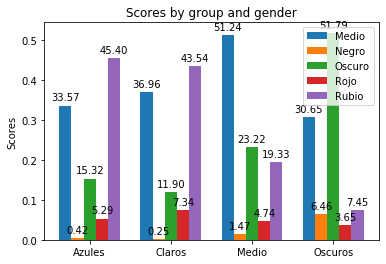

In [186]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(100*height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

labels = ['Azules', 'Claros', 'Medio', 'Oscuros']

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()


for i in range(TCF.shape[1]):
    autolabel(ax.bar(x -(1-i/2)*width, np.array(TCF.iloc[:,i]), width/2, label=TCF.iloc[:,i].name))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

    
plt.show()


El perfil columna se define de manera equivalente, use los códigos anteriores para definirlo.

## Distancia Chi cuadrado

Vamos a definir que tan lejos está una fila de otra. Usaremos la distancia Chi-cuadrado (ji-cuadrado $\chi^2$).

Primero fijamos algunas notaciones útiles:
* Número de elemntos por filas y columnas, tenemos $n$ filas y $p$ columnas:
$$ n_{i.}=\sum\limits_{j=1}^{p} n_{ij}\text{ ,}  \ \  \ n_{.j}=\sum\limits_{i=1}^{n} n_{ij}$$

* Frecuencias relativas absolutas y marginales:
$$ f_{ij}=\cfrac{n_{ij}}{N}\text{,}\ \ \ f_{i.}=\sum\limits_{j=1}^{p}f_{ij}=\cfrac{n_{i.}}{N}\text{,}\ \ \ 
f_{.j}=\sum\limits_{i=1}^{n}f_{ij}=\cfrac{n_{.j}}{N}\text{.}$$
Con esto en mente, definimos la distancia entre dos perfiles como:
* $$d^2(i,i')=\sum\limits_{j=1}^p \cfrac{1}{f_{.j}}\left( \cfrac{f_{ij}}{f_{i.}}-\cfrac{f_{i'j}}{f_{i'.}} \right)^2, \text{ para las filas.}$$

* $$d^2(j,j')=\sum\limits_{i=1}^n \cfrac{1}{f_{i.}}\left( \cfrac{f_{ij}}{f_{.j}}-\cfrac{f_{i'j}}{f_{.j'}}  \right)^2, \text{ para las columnas.}$$



In [187]:
# un código aquí para esos cálculos

El centroide o baricentro de la nube de puntos fila se representa por $\mathcal(G)_f$ y sus coordenadas son iguales a las frecuencias marginales:

$$\mathcal(G)_f=(f_{.1},f_{.2},\cdots, f_{.p}) $$



In [197]:
TCFT=TCFT.append(TCRT.iloc[len(TCRT)-1])
TCFT

Cabello,Medio,Negro,Oscuro,Rojo,Rubio,All
Azules,0.335655,0.004178,0.153203,0.052925,0.454039,1.0
Claros,0.369620,0.002532,0.118987,0.073418,0.435443,1.0
Medio,0.512401,0.014656,0.232244,0.047351,0.193348,1.0
Oscuros,0.306464,0.064639,0.517871,0.036502,0.074525,1.0
All,0.396696,0.021905,0.258214,0.053091,0.270095,1.0


In [200]:
TCFT.iloc[4][1]

0.021904585112307407

In [203]:
s=0
for i in range(4):
    s=s+1/TCFT.iloc[4][i]*(TCFT.iloc[1][i]/TCRT["All"][1]-TCFT.iloc[2][i]/TCRT["All"][2])**2

Matris $S$

In [226]:


np.diag((TCRT.iloc[4][0:5])**(-1/2))@np.transpose(np.array(TCF))@np.diag(TCRT["All"][0:4])@np.array(TCF)@np.diag((TCRT.iloc[4][0:5])**(-1/2))

array([[0.41461336, 0.08335431, 0.30521303, 0.14503136, 0.3229736 ],
       [0.08335431, 0.0499832 , 0.12586505, 0.02605367, 0.03491101],
       [0.30521303, 0.12586505, 0.35052213, 0.10145395, 0.18431818],
       [0.14503136, 0.02605367, 0.10145395, 0.05684315, 0.13577097],
       [0.3229736 , 0.03491101, 0.18431818, 0.13577097, 0.35822916]])

In [220]:
np.diag(TCRT["All"][0:4])

array([[0.13328383, 0.        , 0.        , 0.        ],
       [0.        , 0.29329868, 0.        , 0.        ],
       [0.        , 0.        , 0.3293113 , 0.        ],
       [0.        , 0.        , 0.        , 0.24410618]])